<a href="https://colab.research.google.com/github/unicamp-dl/IA025_2022S1/blob/main/ex04_extra/Marcus_Vinicius_Borela_de_Castro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Marcus Vinícius Borela de Castro

In [107]:
import numpy as np
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

from torchvision import transforms

from sklearn.datasets import load_iris
%matplotlib inline
import matplotlib.pyplot as plt

In [108]:
import random

In [109]:
def inicializa_seed():
  """
  É recomendado reiniciar as seeds antes de inicializar o modelo, pois assim
  garantimos que os pesos vao ser sempre os mesmos.
  fontes de apoio: 
      http://nlp.seas.harvard.edu/2018/04/03/attention.html
      https://github.com/CyberZHG/torch-multi-head-attention/blob/master/torch_multi_head_attention/multi_head_attention.py#L15
  """
  random.seed(123)
  np.random.seed(123)
  torch.manual_seed(123)
  #torch.cuda.manual_seed(123)
  #Cuda algorithms
  #torch.backends.cudnn.deterministic = True 

In [110]:
inicializa_seed()

In [111]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_data = data[:,0:1]
target = data[:,1:2]
n_samples = x_data.shape[0]

print('dimensões de x_data:', x_data.shape)
print('dimensões de target:', target.shape)

dimensões de x_data: (50, 1)
dimensões de target: (50, 1)


In [112]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(target)
xt_min = x_train.min()
xt_max = x_train.max()
x_train_n = (x_train - xt_min)/(xt_max - xt_min)

yt_min = y_train.min()
yt_max = y_train.max()
y_train_n = (y_train - yt_min)/(yt_max - yt_min)

In [113]:
x_train_bias = torch.cat([torch.ones(size=(n_samples,1)), x_train_n], dim=1)
print(x_train_bias.shape)

torch.Size([50, 2])


In [114]:
dataset = TensorDataset(x_train_bias, y_train_n)

In [115]:
data_loader = DataLoader(dataset, 
                         batch_size=10, # tamanho do mini-batch de dados
                         shuffle=True) # se for True, embaralha os dados no inicio de cada iteração

Solução ótima

In [116]:
x_bias, y = next(iter(data_loader))

In [117]:
w_opt = (torch.inverse(x_bias.t().mm(x_bias)).mm(x_bias.t())).mm(y)
print(w_opt.t(), w_opt.shape)

tensor([[0.3068, 0.5517]]) torch.Size([2, 1])


In [118]:
print(len(data_loader))

5


# Exercício é codificar a próxima célula:

In [119]:
# colocar aqui um laço para 
# calcular os valores ótimos associados a cada batch
# é esperado um gráfico parecido com o gráfico

In [120]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [121]:
if torch.cuda.is_available(): print(torch. cuda. get_device_name(device))    

Tesla K80


In [122]:
for idx, batch in enumerate(data_loader):
  print(batch[1])
  break

tensor([[0.7143],
        [0.4762],
        [0.7143],
        [0.6190],
        [0.4762],
        [0.8095],
        [0.4286],
        [0.2381],
        [0.3333],
        [0.6190]])


In [123]:
max_epochs =1000

In [124]:
for cnt_epoca in range(1, max_epochs+1):
  for idx, batch in enumerate(data_loader):
    x_bias = batch[0].to(device)
    y = batch[1].to(device)
    w_opt = (torch.inverse(x_bias.t().mm(x_bias)).mm(x_bias.t())).mm(y)
    if cnt_epoca == 1 and idx ==0:
      pares = np.array([w_opt[0,0].item(), w_opt[1,0].item()]).reshape(1,2)
    else: 
      pares = np.concatenate((pares, np.array([w_opt[0,0].item(), w_opt[1,0].item()]).reshape(1,2)), axis=0)
    #print(f"idx: {idx} w_opt.t(): {w_opt.t()} pares: {pares}")
  if cnt_epoca %10 ==0: 
    print(f"cnt_epoca: {cnt_epoca} qtd_pares_distintos: {len(np.unique(pares, axis=0))}")


cnt_epoca: 10 qtd_pares_distintos: 50
cnt_epoca: 20 qtd_pares_distintos: 100
cnt_epoca: 30 qtd_pares_distintos: 150
cnt_epoca: 40 qtd_pares_distintos: 200
cnt_epoca: 50 qtd_pares_distintos: 250
cnt_epoca: 60 qtd_pares_distintos: 300
cnt_epoca: 70 qtd_pares_distintos: 350
cnt_epoca: 80 qtd_pares_distintos: 400
cnt_epoca: 90 qtd_pares_distintos: 450
cnt_epoca: 100 qtd_pares_distintos: 500
cnt_epoca: 110 qtd_pares_distintos: 550
cnt_epoca: 120 qtd_pares_distintos: 600
cnt_epoca: 130 qtd_pares_distintos: 650
cnt_epoca: 140 qtd_pares_distintos: 700
cnt_epoca: 150 qtd_pares_distintos: 750
cnt_epoca: 160 qtd_pares_distintos: 800
cnt_epoca: 170 qtd_pares_distintos: 850
cnt_epoca: 180 qtd_pares_distintos: 900
cnt_epoca: 190 qtd_pares_distintos: 950
cnt_epoca: 200 qtd_pares_distintos: 1000
cnt_epoca: 210 qtd_pares_distintos: 1050
cnt_epoca: 220 qtd_pares_distintos: 1100
cnt_epoca: 230 qtd_pares_distintos: 1150
cnt_epoca: 240 qtd_pares_distintos: 1200
cnt_epoca: 250 qtd_pares_distintos: 1250
cnt_

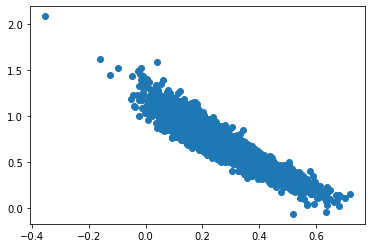

In [125]:
plt.scatter(pares[:,0], pares[:,1])

In [129]:
import math

In [130]:
math.factorial(10)

3628800

Até quantos pontos diferentes podem haver?

O equivalente ao número de combinações diferentes de 50 (n) em grupos de 10 (k: tamanho batch) (ordem não importa):

 n! / (k! * (n - k)!

In [132]:
math.factorial(50)/(math.factorial(10) * math.factorial(40))

10272278170.0

## Rascunhos

In [ ]:
w_opt.cpu().numpy()

array([[0.23553225],
       [0.60998446]], dtype=float32)

In [ ]:
w_opt.shape


torch.Size([2, 1])

In [41]:
w_opt[0,0].item()

0.2355322539806366

In [ ]:
w_opt[1,0].cpu().numpy()

array(0.60998446, dtype=float32)

In [43]:
np.array([w_opt[0,0].item(), w_opt[1,0].item()])

array([0.23553225, 0.60998446])

In [62]:
result = np.array([w_opt[0,0].item(), w_opt[1,0].item()]).reshape(1,2)

In [63]:
result

array([[0.23553225, 0.60998446]])

In [67]:
result = np.concatenate((result, np.array([w_opt[0,0].item(), w_opt[1,0].item()]).reshape(1,2)), axis=0)

In [68]:
result

array([[0.23553225, 0.60998446],
       [0.23553225, 0.60998446]])

In [69]:
result[:,0]

array([0.23553225, 0.23553225])

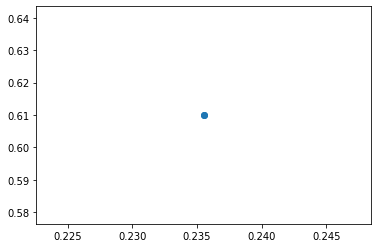

In [70]:
plt.scatter(result[:,0], result[:,1])

In [83]:
(unique, counts) = np.unique(result, return_counts=True)

In [84]:
unique, counts

(array([0.23553225, 0.60998446]), array([2, 2]))

In [85]:
result = np.concatenate((result, np.array([2, 1]).reshape(1,2)), axis=0)

In [86]:
(unique, counts) = np.unique(result, return_counts=True)

In [87]:
unique, counts

(array([0.23553225, 0.60998446, 1.        , 2.        ]), array([2, 2, 1, 1]))

In [89]:
frequencies = np.asarray((unique, counts)).T

In [90]:
frequencies

array([[0.23553225, 2.        ],
       [0.60998446, 2.        ],
       [1.        , 1.        ],
       [2.        , 1.        ]])

In [91]:
result_list = list(result)

In [92]:
(unique, counts) = np.unique(result_list, return_counts=True)

In [93]:
frequencies = np.asarray((unique, counts)).T

In [94]:
frequencies

array([[0.23553225, 2.        ],
       [0.60998446, 2.        ],
       [1.        , 1.        ],
       [2.        , 1.        ]])

In [95]:
np.unique(result_list, axis=0)

array([[0.23553225, 0.60998446],
       [2.        , 1.        ]])